In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv('data_no_bg.csv')

In [2]:
display(data.head())
display(data.info())
display(len(data.espece.unique()),' espèces : ', data.espece.unique())
display(len(data.nom_maladie.unique()), ' maladies : ', data.nom_maladie.unique())

,img_path,espece,malade,nom_maladie
0,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
1,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
2,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
3,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
4,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_path     70295 non-null  object
 1   espece       70295 non-null  object
 2   malade       70295 non-null  bool  
 3   nom_maladie  48001 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.7+ MB


None

14

' espèces : '

array(['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)',
       'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry',
       'Soybean', 'Squash', 'Strawberry', 'Tomato'], dtype=object)

21

' maladies : '

array(['Apple_scab', 'Black_rot', 'Cedar_apple_rust', nan,
       'Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot',
       'Common_rust_', 'Northern_Leaf_Blight', 'Esca_(Black_Measles)',
       'Leaf_blight_(Isariopsis_Leaf_Spot)',
       'Haunglongbing_(Citrus_greening)', 'Bacterial_spot',
       'Early_blight', 'Late_blight', 'Leaf_scorch', 'Leaf_Mold',
       'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
       'Target_Spot', 'Tomato_mosaic_virus',
       'Tomato_Yellow_Leaf_Curl_Virus'], dtype=object)

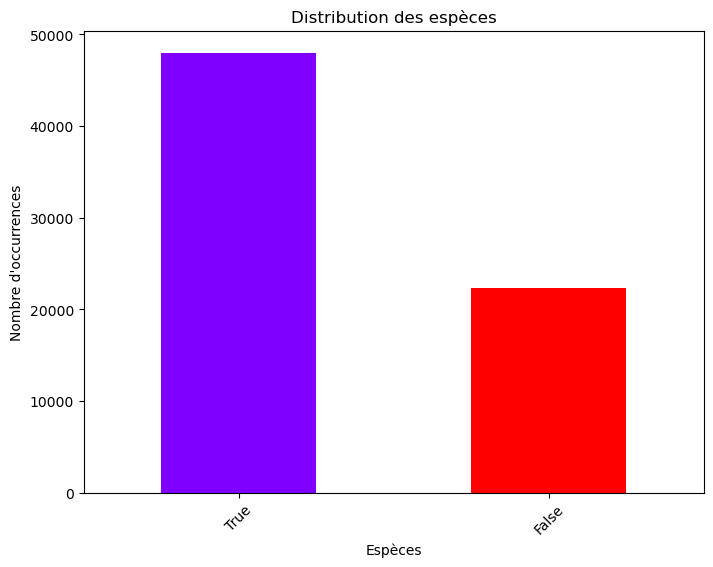

In [3]:
import numpy as np
import matplotlib.pyplot as plt

counts = data['malade'].value_counts()

num_colors = len(counts)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color = colors)
plt.title("Distribution des espèces")
plt.xlabel("Espèces")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

## Rééchantillonnage : Undersampling

In [4]:
import cv2
import numpy as np

# Fonction qui extrait l'histogramme des images 

def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

X = []
y = []

for img_path, label in zip(data['img_path'], data['malade']):
    img = cv2.imread(img_path)
    features = extract_features(img)  
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [5]:
"""!pip install imblearn"""

'!pip install imblearn'

In [6]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler

rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X, y)

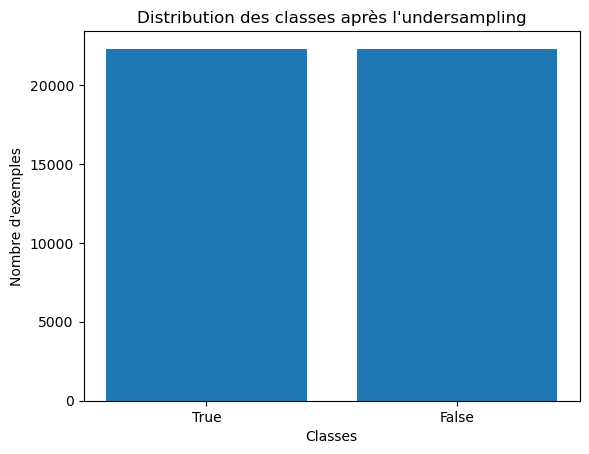

In [7]:
num_true = sum(y_ru)
num_false = len(y_ru) - num_true

labels = ['True', 'False']
values = [num_true, num_false]

plt.bar(labels, values)
plt.xlabel('Classes')
plt.ylabel('Nombre d\'exemples')
plt.title('Distribution des classes après l\'undersampling')
plt.show()

## Création du modèle 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_ru, y_ru, test_size=0.2, random_state=42)

# Instanciation du Random Forest
rf = RandomForestClassifier(random_state=42)

In [9]:
# Recherche des paramètres optimaux pour le Random Forest avec SearchCridCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 250],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy',verbose=40)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.916 total time=   1.5s
[CV 2/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.919 total time=   1.5s
[CV 3/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.922 total time=   1.5s
[CV 4/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.920 total time=   1.6s
[CV 5/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.924 total time=   1.6s
[CV 1/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.928 total time=   7.6s
[CV 2/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.932 total time=   7.9s
[CV 3/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.935 total time=   7.9s
[CV 4/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.937 total time=   7.7s
[CV 5/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.939 total time=   7.9s
[CV 1/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.930 total time=  15.5s
[CV 2/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.936 total time=  15.3s
[CV 3/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.940 total time=  15.4s
[CV 4/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.939 total time=  15.4s
[CV 5/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.938 total time=  15.4s
[CV 1/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.931 total time=  36.8s
[CV 2/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.937 total time=  36.3s
[CV 3/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.942 total time=  36.6s
[CV 4/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.940 total time=  36.5s
[CV 5/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.941 total time=  36.6s
[CV 1/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.911 total time=   1.3s
[CV 2/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.919 total time=   1.5s
[CV 3/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.918 total time=   1.4s
[CV 4/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.922 total time=   1.3s
[CV 5/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.922 total time=   1.3s
[CV 1/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.923 total time=   6.8s
[CV 2/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.934 total time=   6.9s
[CV 3/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.932 total time=   6.8s
[CV 4/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.932 total time=   6.8s
[CV 5/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.933 total time=   6.9s
[CV 1/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.925 total time=  13.8s
[CV 2/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.931 total time=  14.0s
[CV 3/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.932 total time=  13.9s
[CV 4/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.932 total time=  13.6s
[CV 5/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.932 total time=  13.7s
[CV 1/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.927 total time=  34.6s
[CV 2/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.931 total time=  34.3s
[CV 3/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.936 total time=  34.5s
[CV 4/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.933 total time=  34.3s
[CV 5/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.933 total time=  34.6s
[CV 1/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.910 total time=   1.3s
[CV 2/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.917 total time=   1.3s
[CV 3/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.918 total time=   1.3s
[CV 4/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.920 total time=   1.4s
[CV 5/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.923 total time=   1.4s
[CV 1/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.916 total time=   6.6s
[CV 2/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.927 total time=   6.6s
[CV 3/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.929 total time=   6.8s
[CV 4/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.927 total time=   6.5s
[CV 5/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.928 total time=   7.0s
[CV 1/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.920 total time=  13.6s
[CV 2/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.926 total time=  13.2s
[CV 3/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.929 total time=  13.4s
[CV 4/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.926 total time=  13.5s
[CV 5/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.926 total time=  13.6s
[CV 1/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.920 total time=  33.6s
[CV 2/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.927 total time=  33.4s
[CV 3/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.932 total time=  33.8s
[CV 4/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.927 total time=  33.3s
[CV 5/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.927 total time=  33.5s
[CV 1/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 1/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.916 total time=   1.5s
[CV 2/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 2/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.919 total time=   1.5s
[CV 3/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 3/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.922 total time=   1.4s
[CV 4/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 4/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.920 total time=   1.4s
[CV 5/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 5/5; 13/36] END max_features=sqrt, min_samples_lea

[CV 4/5; 21/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=10;, score=0.920 total time=   1.3s
[CV 5/5; 21/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=10....
[CV 5/5; 21/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=10;, score=0.923 total time=   1.3s
[CV 1/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 1/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.916 total time=   6.5s
[CV 2/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 2/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.927 total time=   6.8s
[CV 3/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 3/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.929 total time=   6.8s
[CV 4/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 4/5; 22/36] END max_features=sqrt, min_samples_leaf

[CV 3/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.917 total time=   3.2s
[CV 4/5; 30/36] START max_features=log2, min_samples_leaf=3, n_estimators=50....
[CV 4/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.915 total time=   3.2s
[CV 5/5; 30/36] START max_features=log2, min_samples_leaf=3, n_estimators=50....
[CV 5/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.913 total time=   3.3s
[CV 1/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 1/5; 31/36] END max_features=log2, min_samples_leaf=3, n_estimators=100;, score=0.906 total time=   6.6s
[CV 2/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 2/5; 31/36] END max_features=log2, min_samples_leaf=3, n_estimators=100;, score=0.915 total time=   6.6s
[CV 3/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 3/5; 31/36] END max_features=log2, min_samples_le

C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [10]:
print("Meilleurs hyperparamètres :")
for param, value in best_params.items():
    print(f"{param}: {value}")

Meilleurs hyperparamètres :
max_features: auto
min_samples_leaf: 1
n_estimators: 250


In [11]:
# Entraînement du modèle

rf_model = grid_search.best_estimator_

rf_model.fit(X_train, y_train)

# Évaluation du modèle
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9449428122897511


In [12]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      4468
        True       0.97      0.92      0.94      4450

    accuracy                           0.94      8918
   macro avg       0.95      0.94      0.94      8918
weighted avg       0.95      0.94      0.94      8918



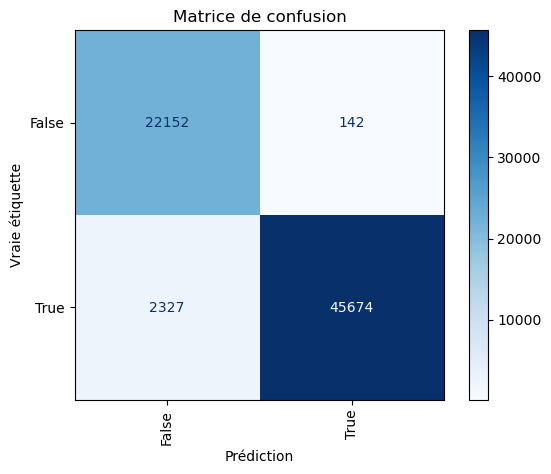

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

In [14]:
import joblib

joblib.dump(rf_model, 'rf_model_malade_no_bg.pkl')

['rf_model_malade_no_bg.pkl']

## Regression logistique

In [15]:
from sklearn.linear_model import LogisticRegression

# Instanciation de la régression logistique
logreg_model = LogisticRegression(random_state=42)

# Entraînement du modèle
logreg_model.fit(X_train, y_train)

# Évaluation du modèle
accuracy = logreg_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7644090603274277


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


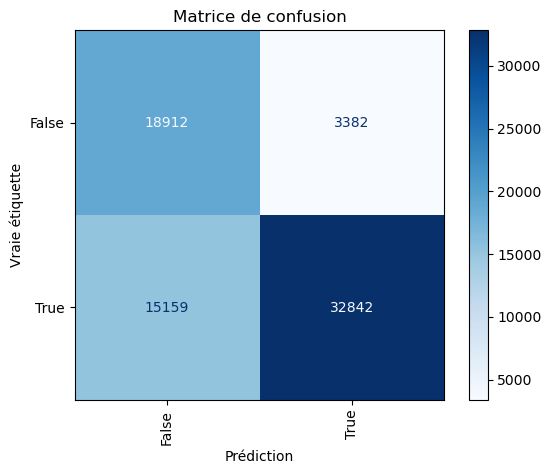

In [16]:
y_pred = logreg_model.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

## Performances du modèle sur les données de test

In [17]:
data_no_bg_test = pd.read_csv('data_no_bg_test.csv')

data_no_bg_test

,img_path,espece,malade,nom_maladie
0,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
1,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
2,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
3,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
4,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Apple,True,Apple_scab
...,...,...,...,...
11995,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
11996,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
11997,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
11998,C:\Users\aissa\Desktop\Projet\dataset_remove_b...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus


In [18]:
X_test = []
y_test = []

for img_path, label in zip(data_no_bg_test['img_path'], data_no_bg_test['malade']):
    img = cv2.imread(img_path)
    features = extract_features(img)  
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [19]:
accuracy = rf_model.score(X_test, y_test)

accuracy

0.9229166666666667